# Abu Ali research

# Extracting the data from Telegram API

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yamti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords
hebrew_stopwords = stopwords.words('hebrew')

In [19]:
def reverse_text(text):
    """Reverse the text for right-to-left languages."""
    return text[::-1]

# Get Hebrew stopwords and reverse them
hebrew_stopwords = set(reverse_text(word) for word in stopwords.words('hebrew'))

print(hebrew_stopwords)

{'ןהל', 'תחת', 'תוז', 'התיא', 'ונילע', 'התוא', 'הביס וזיאמ', 'םכתא', 'ץוחמ', 'ןאכמ', 'ירחא', 'תילכת וזיאל', 'לצא', 'םהילע', 'תורחא', 'ןכתא', 'הללגבש הביסה', 'סא', 'זא', 'תועצמאב', 'ןכתיא', 'הפיא', 'רשאכ', 'ונמצע', 'םכלש', 'תאו', 'לא', 'םירחא', 'תורמל', 'הפיאמ', 'הלוכי', 'לגוסמ', 'לוכי', 'ןתיא', 'ילש', 'ןינמ', 'בוש', 'םתא', 'ש העשב', 'ךכ', 'ללכ', 'הל', 'םתיא', 'דצמ', 'יל', 'יתמ', 'ךרד', 'התא', 'ירוחאמ', 'לומ', 'היהת', 'וב םוקמ', 'וא', 'ינפל', 'הז', 'אוה', 'ימצע', 'הדימ וזיאב', 'הלכי', 'ללגב', 'ןכיעל', 'רגנ', 'ןכ', 'תא', 'ןמ', 'זע', 'יא', 'ליבשב', 'ומכ', 'ןתוא', 'ונ', 'וילע', 'ןהילע', 'ךילע', 'םא', 'םכתיא', 'רחא', 'םה', 'הלא', 'דציכ', 'תרחא', 'םכילע', 'הלעמל', 'איה', 'םילוכי', 'ול', 'ןיאמ', 'ןכיהמ', 'םג', 'ותיא', 'םע', 'עודמ', 'ןאכ', 'ןמצע', 'ןוויכמ', 'ןהלש', 'ךותב', 'לבא', 'רתוי', 'ךתיא', 'שי', 'המצע', 'רשא', 'הזיא', 'ולש', 'ןהמצע', 'םכל', 'ילוא', 'ולא', 'ילב', 'ימ', 'םיטעמ', 'שכ', 'טעמ', 'לכי', 'לש', 'עצמאב', 'אל', 'וליאו', 'ןכל', 'ונל', 'ונתיא', 'הזכ', 'הדימב', 'התיה', 'יכ', 'ינא', 'ו

In [2]:
import pandas as pd
import json

# JSON file path
json_path = r'C:\Users\yamti\Desktop\SeminarCode\abualiexpress_messages.json'

# Load JSON data from the file
with open(json_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convert JSON data to DataFrame
df = pd.DataFrame.from_records(data)

In [3]:
df = df[df['content'].notna() & (df['content'] != '')]

In [4]:
df

,message_id,sender_id,date,content
0,55663,1143765178,2023-12-06T12:46:11+00:00,"המבנה שתקף צה""ל במיס אלג'בל👆 בדרום לבנון"
1,55662,1143765178,2023-12-06T12:41:35+00:00,ערוצים מזוהי חמאס: הצוותים הרפואיים בעיר עזה פ...
2,55661,1143765178,2023-12-06T12:37:12+00:00,ארבעה מטוסי סוחוי 35 רוסים ליוו את מטוסו של פו...
3,55660,1143765178,2023-12-06T11:25:01+00:00,"כלי תקשורת לבנוניים: כטב""מ ישראלי תקף מבנה במי..."
5,55658,1143765178,2023-12-06T11:15:01+00:00,"נשיא רוסיה, פוטין נחת באיחוד האמירויות וזכה לק..."
...,...,...,...,...
55032,15,1143765178,2017-08-26T12:50:00+00:00,חיילי אסד לומדים מניסיונם של אנשי אלחשד אלשעבי...
55033,11,1143765178,2017-08-26T10:21:55+00:00,https://m.facebook.com/story.php?story_fbid=15...
55035,9,1143765178,2017-08-26T08:24:46+00:00,"""ואם תשובו... אנחנו נשוב"""
55036,8,1143765178,2017-08-26T08:24:19+00:00,"חיזבאללה חוגגים ניצחונות על דאע""ש באזור אלקלמו..."


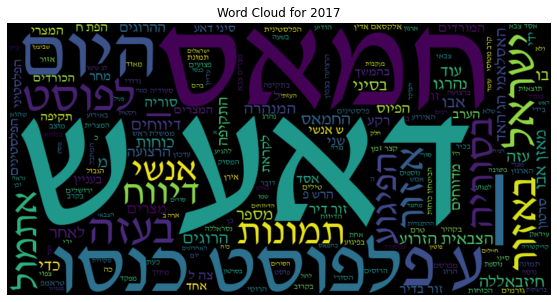

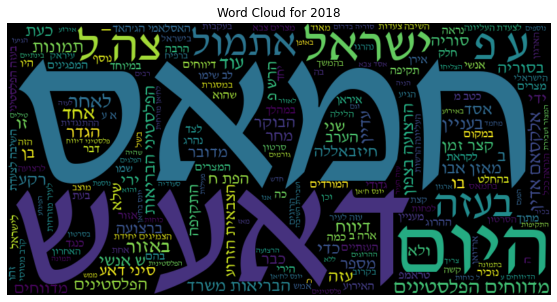

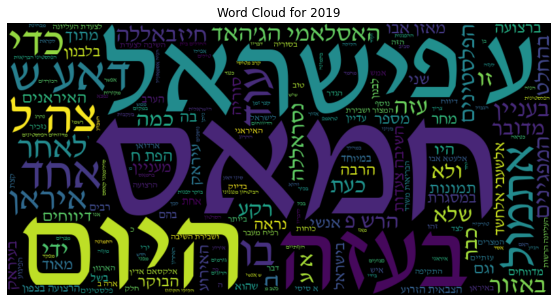

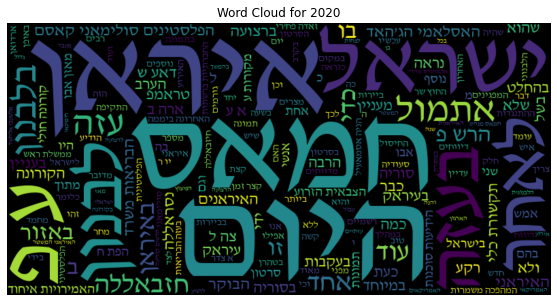

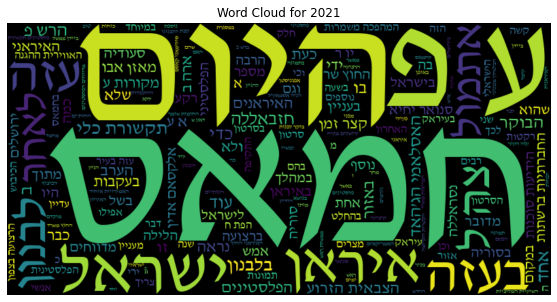

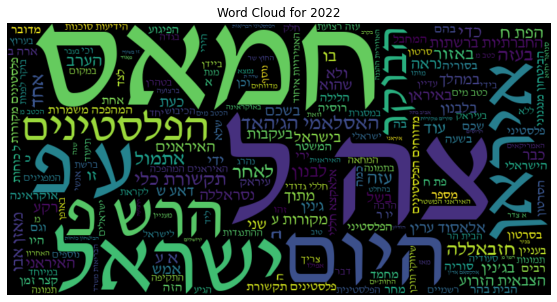

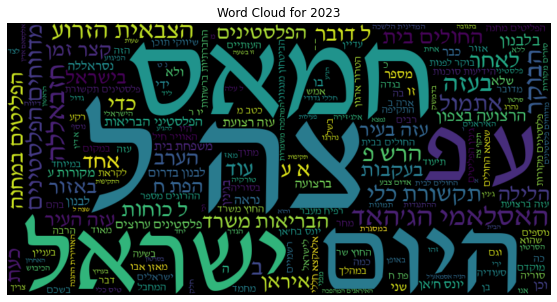

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re


# Assuming df is your DataFrame
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
grouped = df.groupby('year')


def process_text(text, truncate_phrase, remove_english_and_numbers=True):
    """Truncate the text and remove English characters and numbers."""
    # Truncate text after a specific phrase
    phrase_index = text.find(truncate_phrase)
    if phrase_index != -1:
        text = text[:phrase_index]

    # Remove English characters and numbers if specified
    if remove_english_and_numbers:
        text = re.sub(r'[A-Za-z0-9]', '', text)

    return text


# Short phrase to truncate after
truncate_phrase = "[כדי"

font_path = 'C:\\Windows\\Fonts\\DAVID.TTF'

for year, group in grouped:
    text = ' '.join(process_text(text, truncate_phrase) for text in group['content'].dropna())
    if not text.strip():
        continue  # Skip empty text
        
    reversed_text = ' '.join(word[::-1] for word in text.split())
    wordcloud = WordCloud(width=800, height=400, font_path=font_path, stopwords=hebrew_stopwords).generate(reversed_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {year}')
    plt.axis('off')
    plt.show()


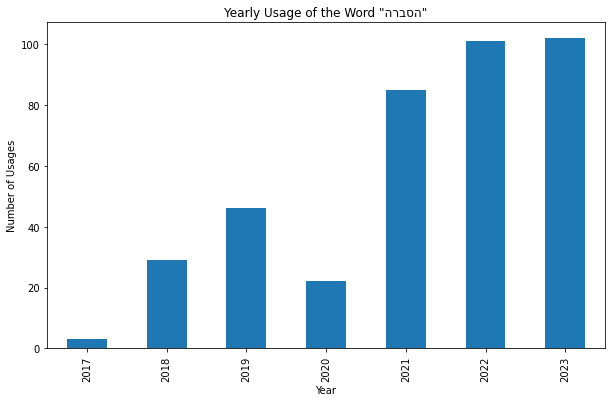

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year
df['year'] = df['date'].dt.year

# Count occurrences of the word "הסברה" in 'content' for each year
word = "הסברה"
df['word_count'] = df['content'].apply(lambda x: x.count(word))
yearly_counts = df.groupby('year')['word_count'].sum()

# Plotting
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.title('Yearly Usage of the Word "הרבסה"')
plt.xlabel('Year')
plt.ylabel('Number of Usages')
plt.show()

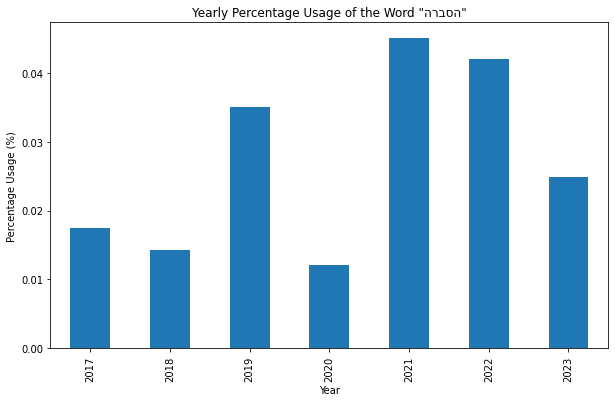

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert the 'date' column to datetime and extract the year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Count occurrences of the word "הסברה"
word = "הסברה"
df['word_count'] = df['content'].apply(lambda x: x.count(word))

# Count total words per year
df['total_words'] = df['content'].apply(lambda x: len(x.split()))
yearly_totals = df.groupby('year')['total_words'].sum()

# Calculate the percentage usage of the word per year
yearly_word_counts = df.groupby('year')['word_count'].sum()
yearly_percentages = (yearly_word_counts / yearly_totals) * 100

# Plotting
plt.figure(figsize=(10, 6))
yearly_percentages.plot(kind='bar')
plt.title('Yearly Percentage Usage of the Word "הרבסה"')
plt.xlabel('Year')
plt.ylabel('Percentage Usage (%)')
plt.show()
